In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score  
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
rela_embedding = pd.read_csv('./data/KRAL_Embedding_Model_WINE_D032-rela.csv')
tail_embedding=pd.read_csv('./data/KRAL_Embedding_Model_WINE_D032-tail.csv')
rela_embedding

,relation,0,1,2,3,4,5,6,7,8,...,22,23,24,25,26,27,28,29,30,31
0,color,-0.780459,-0.819202,-0.079531,0.002302,0.415846,-0.369271,-0.337928,0.104645,-0.226303,...,0.077509,-0.020859,-0.004779,-0.007266,-0.003316,0.008393,-0.002344,0.001053,0.003404,0.003093
1,fixed_acidity2,-0.525580,-0.338299,-0.192783,0.002961,-0.074393,-0.466257,0.397022,0.309253,0.377345,...,0.044306,-0.018012,-0.002080,-0.006819,-0.002374,0.004299,-0.002976,0.000791,0.003304,0.002360
2,volatile_acidity,-0.525590,-0.338834,-0.083471,0.002481,-0.503688,-0.524055,0.504680,0.456927,-0.114148,...,0.044923,-0.030009,0.006857,-0.006719,-0.002497,-0.000841,-0.004737,0.001397,0.002228,0.001707
3,citric_acid,-0.525814,-0.403184,-0.074850,0.002485,-0.066606,-0.960868,0.149965,0.700557,-0.025680,...,0.044470,-0.029471,0.006806,-0.006836,-0.002362,-0.000599,-0.004666,0.001400,0.002171,0.001746
4,residual_sugar,-0.951255,-0.827581,-0.193311,0.002483,-0.066542,-0.524006,0.149339,0.308984,0.186828,...,0.044656,-0.029755,0.006756,-0.006920,-0.002264,-0.000845,-0.004772,0.001392,0.002443,0.001704
5,chlorides,-1.525835,-0.339388,-0.193003,0.002487,-0.053149,-0.523834,0.148613,0.308482,-0.025597,...,0.044515,-0.030038,0.006853,-0.007010,-0.002388,-0.000831,-0.004796,0.001396,0.002182,0.001756
6,free_sulfur_dioxide,-0.640656,-0.340037,-0.192824,0.002493,0.306701,-0.921924,0.149310,0.308407,-0.024647,...,0.044518,-0.029847,0.006876,-0.006909,-0.002461,-0.000844,-0.004720,0.001393,0.001918,0.001639
7,total_sulfur_dioxide,-0.481660,-0.475583,-0.088142,0.002471,-0.227231,-0.524676,0.397360,0.534592,-0.198140,...,0.044422,-0.029893,0.006762,-0.006653,-0.002364,-0.000891,-0.004801,0.001415,0.002182,0.001735
8,density,-0.526462,-0.339518,-0.192353,0.002486,-0.065898,-0.523499,0.149878,0.308123,-0.025148,...,0.044500,-0.029697,0.006792,-0.006780,-0.002339,-0.000745,-0.004727,0.001382,0.002192,0.001738
9,pH,-0.526040,-0.341073,-0.182093,0.002464,-0.111032,-0.523484,0.148951,0.309946,0.068602,...,0.066713,-0.037684,0.011221,-0.006882,-0.000795,-0.000435,-0.004734,0.001171,0.002654,0.001736


In [ ]:
x_test = pd.read_csv("./data/Wine_test.csv")
wine_train_val=pd.read_csv("./data/Wine_training.csv")
x_test = x_test[x_test['quality'] != 6]
wine_train_val = wine_train_val[wine_train_val['quality'] != 6]
y_train_val=wine_train_val['quality']
y_test=x_test['quality']
x_test=x_test.drop(['quality'],axis=1)
wine_train_val=wine_train_val.drop(['quality'],axis=1)

y_test = y_test.apply(lambda x: 1 if x > 6 else 0)
y_train_val=y_train_val.apply(lambda x: 1 if x > 6 else 0)
y_train_val.unique()

array([0, 1], dtype=int64)

In [ ]:
tail_embedding

,tail,0,1,2,3,4,5,6,7,8,...,22,23,24,25,26,27,28,29,30,31
0,color:White,0.254239,0.479577,-0.113459,0.000173,-0.481221,-0.154076,0.487161,0.204087,0.200943,...,-0.03257,-0.009279,0.011546,0.000206,0.001081,-0.009186,-0.002465,0.00036,-0.00123,-0.00132
1,fixed_acidity2:6.9,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.981665,...,0.00000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.00000,-0.00000,-0.00000
2,volatile_acidity:0.38,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.809942,-0.586510,0.000000,...,-0.00000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.00000,-0.00000,0.00000
3,citric_acid:0.25,0.000000,0.000000,-0.000000,0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,...,-0.00000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.00000,-0.00000,0.00000
4,residual_sugar:9.8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.993884,...,0.00000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.00000,-0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2645,density:0.98774,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.00000,0.00000,0.00000
2646,alcohol:11.46666667,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,...,0.00000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,-0.00000
2647,pH:2.77,0.052559,0.998618,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,...,-0.00000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.00000,-0.00000,0.00000
2648,total_sulfur_dioxide:176.5,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.876960,...,0.00000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,-0.00000


In [ ]:
print(tail_embedding.isnull().any().any())
print(rela_embedding.isnull().any().any())
print(wine_train_val.isnull().any().any())
print(x_test.isnull().any().any())


False
False
False
False


In [ ]:
print(rela_embedding.relation.unique())
print(x_test.columns)
print(wine_train_val.columns)

['color' 'fixed_acidity2' 'volatile_acidity' 'citric_acid'
 'residual_sugar' 'chlorides' 'free_sulfur_dioxide' 'total_sulfur_dioxide'
 'density' 'pH' 'sulphates' 'alcohol']
Index(['Color', 'fixed acidity2', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')
Index(['Color', 'fixed acidity2', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')


In [ ]:
x_test.columns=x_test.columns.str.lower().str.replace(' ', '_')
wine_train_val.columns=wine_train_val.columns.str.lower().str.replace(' ', '_')
x_test = x_test.rename(columns={'ph': 'pH'})
wine_train_val = wine_train_val.rename(columns={'ph': 'pH'})

print(rela_embedding.relation.unique())
print(x_test.columns)
print(wine_train_val.columns)

['color' 'fixed_acidity2' 'volatile_acidity' 'citric_acid'
 'residual_sugar' 'chlorides' 'free_sulfur_dioxide' 'total_sulfur_dioxide'
 'density' 'pH' 'sulphates' 'alcohol']
Index(['color', 'fixed_acidity2', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')
Index(['color', 'fixed_acidity2', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')


In [ ]:

# define a function to construct the desired string
def format_value(col, val):
    if pd.isna(val):
        return val
    else:
        return col + ':' + str(val)

x_test_mapping=x_test.copy()
x_test_dct = x_test_mapping.to_dict(orient='list')



x_test_mapping_dct = {}
for col in x_test_dct:
    x_test_mapping_dct[col] = [format_value(col, val) for val in x_test_dct[col]]

print(x_test_mapping_dct)


{'color': ['color:White', 'color:White', 'color:White', 'color:White', 'color:White', 'color:White', 'color:Red', 'color:White', 'color:White', 'color:White', 'color:Red', 'color:White', 'color:Red', 'color:White', 'color:White', 'color:Red', 'color:White', 'color:White', 'color:White', 'color:White', 'color:Red', 'color:White', 'color:Red', 'color:Red', 'color:White', 'color:White', 'color:White', 'color:White', 'color:White', 'color:White', 'color:White', 'color:White', 'color:Red', 'color:Red', 'color:Red', 'color:Red', 'color:White', 'color:White', 'color:White', 'color:Red', 'color:White', 'color:White', 'color:White', 'color:White', 'color:White', 'color:White', 'color:Red', 'color:White', 'color:White', 'color:Red', 'color:White', 'color:White', 'color:White', 'color:White', 'color:White', 'color:White', 'color:White', 'color:Red', 'color:White', 'color:Red', 'color:White', 'color:White', 'color:Red', 'color:White', 'color:White', 'color:Red', 'color:White', 'color:White', 'colo

In [ ]:
x_test_mapping_df=pd.DataFrame(x_test_mapping_dct)
x_test_mapping_df

,color,fixed_acidity2,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,color:White,fixed_acidity2:7.2,volatile_acidity:0.5,citric_acid:0.0,residual_sugar:0.8,chlorides:0.034,free_sulfur_dioxide:46.0,total_sulfur_dioxide:114.0,density:0.9932,pH:3.19,sulphates:0.34,alcohol:9.2
1,color:White,fixed_acidity2:7.0,volatile_acidity:0.2,citric_acid:0.74,residual_sugar:0.8,chlorides:0.044000000000000004,free_sulfur_dioxide:19.0,total_sulfur_dioxide:163.0,density:0.9931,pH:3.46,sulphates:0.53,alcohol:10.2
2,color:White,fixed_acidity2:5.1,volatile_acidity:0.26,citric_acid:0.33,residual_sugar:1.1,chlorides:0.027000000000000003,free_sulfur_dioxide:46.0,total_sulfur_dioxide:113.0,density:0.98946,pH:3.35,sulphates:0.43,alcohol:11.4
3,color:White,fixed_acidity2:7.1,volatile_acidity:0.44,citric_acid:0.37,residual_sugar:2.7,chlorides:0.040999999999999995,free_sulfur_dioxide:35.0,total_sulfur_dioxide:128.0,density:0.9896,pH:3.07,sulphates:0.43,alcohol:13.5
4,color:White,fixed_acidity2:7.1,volatile_acidity:0.29,citric_acid:0.3,residual_sugar:16.0,chlorides:0.036000000000000004,free_sulfur_dioxide:58.0,total_sulfur_dioxide:201.0,density:0.99954,pH:3.3,sulphates:0.67,alcohol:9.0
...,...,...,...,...,...,...,...,...,...,...,...,...
541,color:Red,fixed_acidity2:6.5,volatile_acidity:0.46,citric_acid:0.14,residual_sugar:2.4,chlorides:0.114,free_sulfur_dioxide:9.0,total_sulfur_dioxide:37.0,density:0.9973200000000001,pH:3.66,sulphates:0.65,alcohol:9.8
542,color:Red,fixed_acidity2:8.5,volatile_acidity:0.18,citric_acid:0.51,residual_sugar:1.75,chlorides:0.071,free_sulfur_dioxide:45.0,total_sulfur_dioxide:88.0,density:0.99524,pH:3.33,sulphates:0.76,alcohol:11.8
543,color:White,fixed_acidity2:7.5,volatile_acidity:0.35,citric_acid:0.48,residual_sugar:12.4,chlorides:0.055999999999999994,free_sulfur_dioxide:61.0,total_sulfur_dioxide:176.5,density:0.99803,pH:2.97,sulphates:0.52,alcohol:8.8
544,color:Red,fixed_acidity2:6.1,volatile_acidity:0.4,citric_acid:0.16,residual_sugar:1.8,chlorides:0.069,free_sulfur_dioxide:11.0,total_sulfur_dioxide:25.0,density:0.9955,pH:3.42,sulphates:0.74,alcohol:10.1


In [ ]:
x_test_mapping_df.to_csv('./data/x_test_map_tail.csv')

In [ ]:

# define a function to construct the desired string
def format_value(col, val):
    if pd.isna(val):
        return val
    else:
        return col + ':' + str(val)

x_trainval_mapping=wine_train_val.copy()

x_trainval_dct = x_trainval_mapping.to_dict(orient='list')



x_trainval_mapping_dct = {}
for col in x_trainval_dct:
    x_trainval_mapping_dct[col] = [format_value(col, val) for val in x_trainval_dct[col]]



In [ ]:
x_trainval_mapping_df=pd.DataFrame(x_trainval_mapping_dct)
x_trainval_mapping_df

,color,fixed_acidity2,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,color:White,fixed_acidity2:6.9,volatile_acidity:0.38,citric_acid:0.25,residual_sugar:9.8,chlorides:0.04,free_sulfur_dioxide:28.0,total_sulfur_dioxide:191.0,density:0.9971,pH:3.28,sulphates:0.61,alcohol:9.2
1,color:White,fixed_acidity2:6.0,volatile_acidity:0.19,citric_acid:0.29,residual_sugar:1.1,chlorides:0.047,free_sulfur_dioxide:67.0,total_sulfur_dioxide:152.0,density:0.9916,pH:3.54,sulphates:0.59,alcohol:11.1
2,color:White,fixed_acidity2:6.1,volatile_acidity:0.24,citric_acid:0.32,residual_sugar:9.0,chlorides:0.031,free_sulfur_dioxide:41.0,total_sulfur_dioxide:134.0,density:0.99234,pH:3.25,sulphates:0.26,alcohol:12.3
3,color:White,fixed_acidity2:7.7,volatile_acidity:0.16,citric_acid:0.41,residual_sugar:1.7,chlorides:0.048,free_sulfur_dioxide:60.0,total_sulfur_dioxide:173.0,density:0.9932,pH:3.24,sulphates:0.66,alcohol:11.2
4,color:White,fixed_acidity2:7.6,volatile_acidity:0.26,citric_acid:0.47,residual_sugar:1.6,chlorides:0.068,free_sulfur_dioxide:5.0,total_sulfur_dioxide:55.0,density:0.9944,pH:3.1,sulphates:0.45,alcohol:9.6
...,...,...,...,...,...,...,...,...,...,...,...,...
3110,color:Red,fixed_acidity2:7.5,volatile_acidity:0.77,citric_acid:0.2,residual_sugar:8.1,chlorides:0.098,free_sulfur_dioxide:30.0,total_sulfur_dioxide:92.0,density:0.99892,pH:3.2,sulphates:0.58,alcohol:9.2
3111,color:White,fixed_acidity2:7.5,volatile_acidity:0.23,citric_acid:0.3,residual_sugar:1.2,chlorides:0.03,free_sulfur_dioxide:27.0,total_sulfur_dioxide:80.0,density:0.99192,pH:3.05,sulphates:0.68,alcohol:10.5
3112,color:White,fixed_acidity2:6.6,volatile_acidity:0.545,citric_acid:0.04,residual_sugar:2.5,chlorides:0.031,free_sulfur_dioxide:48.0,total_sulfur_dioxide:111.0,density:0.9906,pH:3.14,sulphates:0.32,alcohol:11.9
3113,color:White,fixed_acidity2:7.2,volatile_acidity:0.13,citric_acid:0.46,residual_sugar:1.3,chlorides:0.044000000000000004,free_sulfur_dioxide:48.0,total_sulfur_dioxide:111.0,density:0.9912700000000001,pH:2.97,sulphates:0.45,alcohol:11.1


In [ ]:
x_trainval_mapping_df.to_csv('.data/x_trainval_mapping_tail.csv')

In [ ]:
test_notnull=[]
for i in range(len(x_test_mapping_df)):
    total_test_reltal=[]
    for j in x_test_mapping_df.columns:
        rela=rela_embedding[rela_embedding.relation==j].drop(['relation'],axis=1).values.tolist()[0]
        tailv=tail_embedding[tail_embedding['tail']==x_test_mapping_df.loc[i,j]].drop(['tail'],axis=1).values.tolist()
        if tailv:
            total_test_reltal.append((rela+tailv[0]))
    test_notnull.append(total_test_reltal)
      

test_notnull_len=[]
for i in range(len(test_notnull)):
    test_notnull_len.append(len(test_notnull[i]))

In [ ]:
print(len(test_notnull))

print(len(test_notnull[0]))
print(len(test_notnull[0][0]))


546
9
64


In [ ]:
import pickle
filename = '.data/wine_test_notnull.pickle'

# open the file for writing in binary mode
with open(filename, 'wb') as f:
    # serialize the list and write it to the file
    pickle.dump(test_notnull, f)

In [ ]:
train_val_notnulllst=[]
for i in range(len(x_trainval_mapping_df)):
    total_trainval_reltal=[]
    for j in x_trainval_mapping_df.columns:
        rela=rela_embedding[rela_embedding.relation==j].drop(['relation'],axis=1).values.tolist()[0]
        tailv=tail_embedding[tail_embedding['tail']==x_trainval_mapping_df.loc[i,j]].drop(['tail'],axis=1).values.tolist()
        if tailv:
            total_trainval_reltal.append((rela+tailv[0]))
    train_val_notnulllst.append(total_trainval_reltal)
      
trainval_notnull_len=[]
for i in range(len(train_val_notnulllst)):
    trainval_notnull_len.append(len(train_val_notnulllst[i]))

In [ ]:
print(len(train_val_notnulllst))

print(len(train_val_notnulllst[1]))
print(len(train_val_notnulllst[1][0]))


3115
9
64


In [ ]:
with open('./data/wine_train_val_notnull.pickle', 'wb') as f:
    # serialize the list and write it to the file
    pickle.dump(train_val_notnulllst, f)

# LR

In [ ]:
print('pos: ', sum(y_test)/len(y_test))
print('neg: ', 1-sum(y_test)/len(y_test))
neg=1-sum(y_test)/len(y_test)
pos=sum(y_test)/len(y_test)
print(neg/pos)

pos:  0.3443223443223443
neg:  0.6556776556776557
1.9042553191489362


In [ ]:
print('y_train_val pos: ', sum(y_train_val)/len(y_train_val))
print('y_train_val neg: ', 1-sum(y_train_val)/len(y_train_val))
neg=1-sum(y_train_val)/len(y_train_val)
pos=sum(y_train_val)/len(y_train_val)
print('y_train_val neg/pos: ',neg/pos)

y_train_val pos:  0.34959871589085073
y_train_val neg:  0.6504012841091493
y_train_val neg/pos:  1.8604224058769514


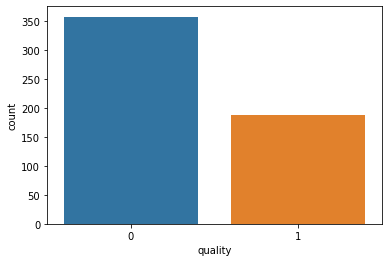

In [ ]:
import seaborn as sns
import plotly.express as px
sns.countplot(x=y_test)

In [ ]:
wine_train_val=pd.read_csv('.data//wine_train_val.csv').drop(['Unnamed: 0'],axis=1)
x_test=pd.read_csv('.data/wine_x_test.csv').drop(['Unnamed: 0'],axis=1)


,color,fixed_acidity2,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,White,6.9,0.380,0.25,9.8,0.040,28.0,191.0,0.99710,3.28,0.61,9.2
1,White,6.0,0.190,0.29,1.1,0.047,67.0,152.0,0.99160,3.54,0.59,11.1
2,White,6.1,0.240,0.32,9.0,0.031,41.0,134.0,0.99234,3.25,0.26,12.3
3,White,7.7,0.160,0.41,1.7,0.048,60.0,173.0,0.99320,3.24,0.66,11.2
4,White,7.6,0.260,0.47,1.6,0.068,5.0,55.0,0.99440,3.10,0.45,9.6
...,...,...,...,...,...,...,...,...,...,...,...,...
3110,Red,7.5,0.770,0.20,8.1,0.098,30.0,92.0,0.99892,3.20,0.58,9.2
3111,White,7.5,0.230,0.30,1.2,0.030,27.0,80.0,0.99192,3.05,0.68,10.5
3112,White,6.6,0.545,0.04,2.5,0.031,48.0,111.0,0.99060,3.14,0.32,11.9
3113,White,7.2,0.130,0.46,1.3,0.044,48.0,111.0,0.99127,2.97,0.45,11.1


In [ ]:
import random
from sklearn.model_selection import train_test_split
train_val_data=wine_train_val 
train_val_label=y_train_val.values.tolist()

train_data, val_data, train_y, val_y =  train_test_split(train_val_data,train_val_label,test_size=0.3, stratify=train_val_label, random_state=0)

print(len(train_val_label))
print(len(train_data))
print(len(val_data))


3115
2180
935


In [ ]:
train_data.to_csv('./data/tabel_train_data.csv',index=0)
val_data.to_csv('./data/tabel_val_data.csv',index=0)
pd.DataFrame(train_y).to_csv('./data/tabel_train_y.csv',index=0)
pd.DataFrame(val_y).to_csv('./data/tabel_val_y.csv',index=0)


In [ ]:
train_data=pd.read_csv('.data/tabel_train_data.csv')
val_data=pd.read_csv('.data/tabel_val_data.csv')
train_y=pd.read_csv('.data/tabel_train_y.csv')
val_y=pd.read_csv('.data/tabel_val_y.csv')
y_test=pd.read_csv('.data/y_test_wine.csv').drop(['Unnamed: 0'],axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

x_test = pd.get_dummies(x_test, columns=['color'])
x_train=pd.get_dummies(train_data, columns=['color'])
x_val=pd.get_dummies(val_data, columns=['color'])


x_scaler = StandardScaler()
x_train= x_scaler.fit_transform(x_train)
x_test= x_scaler.fit_transform(x_test)
x_val=x_scaler.fit_transform(x_val)
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(2180, 13)
(546, 13)
(935, 13)


In [ ]:
model_1 = LogisticRegression(max_iter=8000).fit(x_train, train_y)
y_predict2=model_1.predict_proba(x_val)[:, 1]

#find the optimal threshold
precision2, recall2, thresholds2 = precision_recall_curve(val_y, y_predict2)

df_recall_precision2 = pd.DataFrame({'Precision':precision2[:-1],
                                    'Recall':recall2[:-1],
                                    'Threshold':thresholds2})
df_recall_precision2


,Precision,Recall,Threshold
0,0.357377,1.000000,0.002072
1,0.356674,0.996942,0.002236
2,0.357065,0.996942,0.002249
3,0.357456,0.996942,0.002264
4,0.357849,0.996942,0.002627
...,...,...,...
863,0.800000,0.012232,0.987174
864,0.750000,0.009174,0.990905
865,1.000000,0.009174,0.991369
866,1.000000,0.006116,0.992159


In [ ]:
np.seterr(divide='ignore', invalid='ignore')
f1_score = (2 * precision2 * recall2) / (precision2 + recall2)
findex=list(f1_score).index(max(f1_score))
thresholdOpt = round(thresholds2[findex], ndigits = 4)
fscoreOpt = round(f1_score[findex], ndigits = 4)
recallOpt = round(recall2[findex], ndigits = 4)
precisionOpt = round(precision2[findex], ndigits = 4)
print('Best Threshold: {} , F-Score: {}'.format(thresholdOpt, fscoreOpt))
print('Recall: {}, Precision: {}'.format(recallOpt, precisionOpt))

from sklearn.metrics import precision_score, classification_report, recall_score, f1_score, roc_auc_score, confusion_matrix, accuracy_score
y_pre_test2=model_1.predict_proba(x_test)[:, 1]
defaulter_decision_2 = (y_pre_test2 >= thresholdOpt)
print(classification_report(y_test, defaulter_decision_2))



Best Threshold: 0.4211 , F-Score: 0.7633
Recall: 0.789, Precision: 0.7393
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       358
           1       0.74      0.75      0.75       188

    accuracy                           0.82       546
   macro avg       0.81      0.81      0.81       546
weighted avg       0.82      0.82      0.82       546



In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(max_depth=8)
model.fit(x_train, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:

y_predict=model.predict_proba(x_val)[:, 1]

#find the optimal threshold
precision, recall, thresholds = precision_recall_curve(val_y, y_predict)

df_recall_precision = pd.DataFrame({'Precision':precision[:-1],
                                    'Recall':recall[:-1],
                                    'Threshold':thresholds})

np.seterr(divide='ignore', invalid='ignore')
f1_score = (2 * precision * recall) / (precision + recall)
findex=list(f1_score).index(max(f1_score))
thresholdOpt = round(thresholds[findex], ndigits = 4)
fscoreOpt = round(f1_score[findex], ndigits = 4)
recallOpt = round(recall[findex], ndigits = 4)
precisionOpt = round(precision[findex], ndigits = 4)
print('Best Threshold: {} , F-Score: {}'.format(thresholdOpt, fscoreOpt))
print('Recall: {}, Precision: {}'.format(recallOpt, precisionOpt))

from sklearn.metrics import precision_score, classification_report, recall_score, f1_score, roc_auc_score, confusion_matrix, accuracy_score
y_pre_test=model.predict_proba(x_test)[:, 1]
defaulter_decision = (y_pre_test >= thresholdOpt)
print(classification_report(y_test, defaulter_decision))





Best Threshold: 0.349700003862381 , F-Score: 0.8431
Recall: 0.9205, Precision: 0.7778
              precision    recall  f1-score   support

           0       0.94      0.83      0.88       358
           1       0.74      0.90      0.81       188

    accuracy                           0.86       546
   macro avg       0.84      0.87      0.85       546
weighted avg       0.87      0.86      0.86       546

